In [1]:
from cluster import cluster
from cluster.methods import *

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [12]:
from itertools import product


ks = tuple(2 ** i for i in range(2, 9))
ns = tuple(2 ** i for i in range(10, 18))


def instance(n, k):
    s = 1

    q = int(k ** (1 / 2))
    xs = []

    for i, j in product(range(q), repeat=2):
        xsij = np.random.normal(loc=(i, j), scale=s, size=(n // k, 2))
        xs.append(xsij)
    
    return np.vstack(xs)

Call each method to compile it.

In [13]:
methods = (compare, sort, hamerly, hamerly2)
for method in methods:
    cluster(instance(1000, 4), 4, method=method)

In [14]:
from tqdm import tqdm


res = []
for n, k, method in tqdm(list(product(ns, ks, methods))):
    if n <= k:
        continue

    xs = instance(n, k)
    t = %timeit -n 1 -r 1 -q -o cluster(xs, k, method=method)  # type: ignore
    res.append((n, k, method.__name__, t.best))

100%|██████████| 224/224 [13:27<00:00,  3.60s/it]


In [18]:
df = pd.DataFrame.from_records(res, columns=["n", "k", "method", "time"])

series = df.set_index(["method", "n", "k"]).time
series = series / series.at["hamerly2"]
ndf = pd.DataFrame(series).reset_index()

ndf["nk"] = ndf.n / ndf.k

<AxesSubplot: xlabel='k', ylabel='time'>

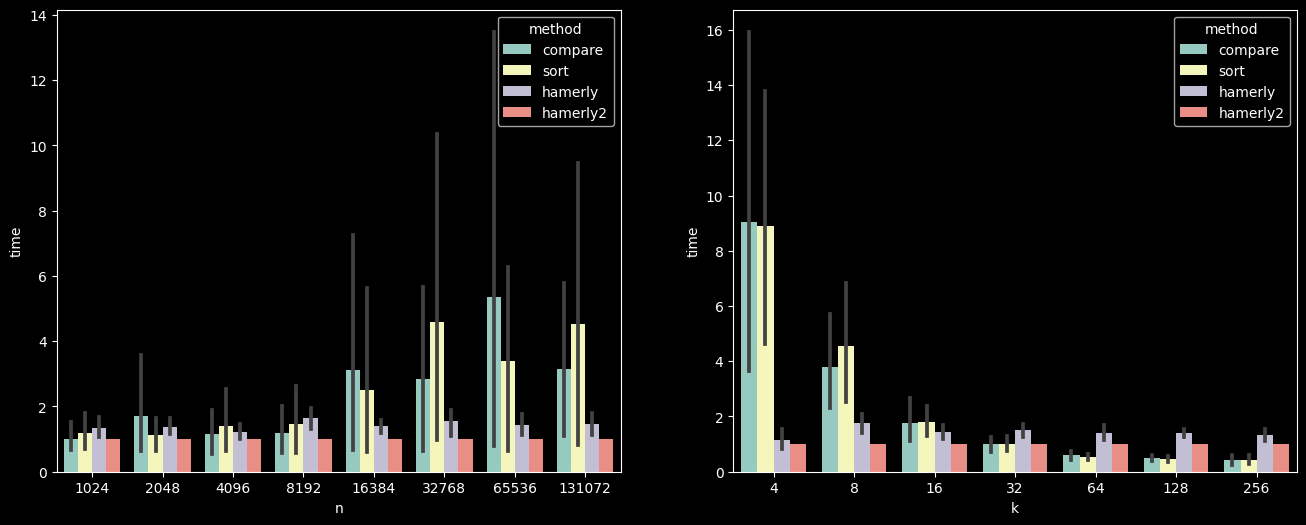

In [19]:
_, (a1, a2) = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(ax=a1, data=ndf, x="n", y="time", hue="method")
sns.barplot(ax=a2, data=ndf, x="k", y="time", hue="method")

<AxesSubplot: xlabel='nk', ylabel='time'>

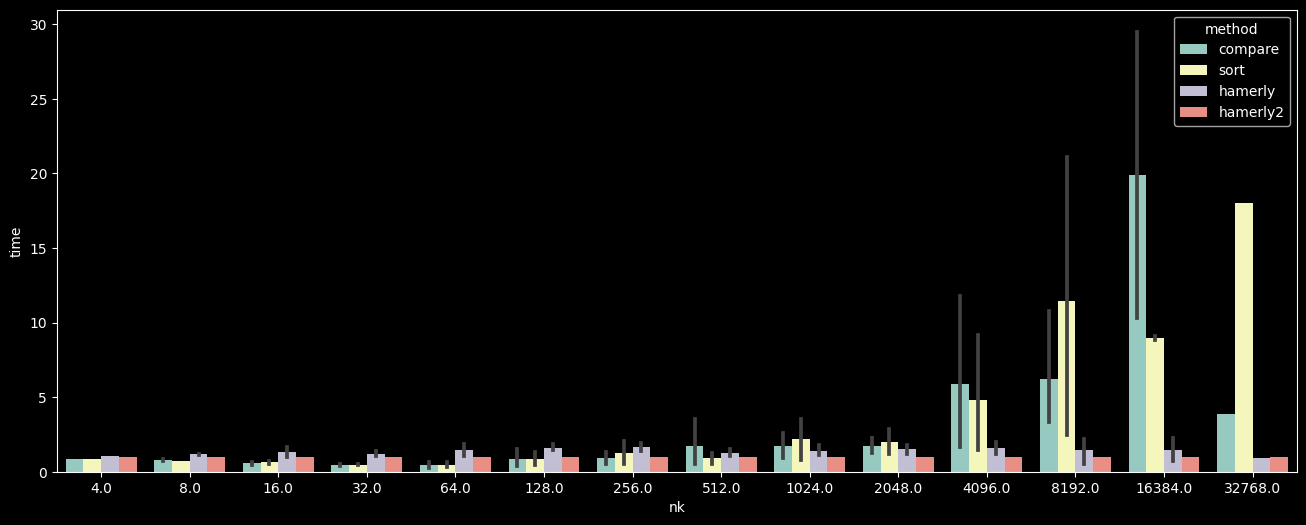

In [20]:
_, ax = plt.subplots(figsize=(16, 6))
sns.barplot(ax=ax, data=ndf, x="nk", y="time", hue="method")